# Fair Value Gap - Analytics

### Import Library

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns
from candlestick import WHITE_CS, BLACK_CS, DOJI_CS
import candlestick.price_action as pa

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [2]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [3]:
data = dataset.copy()

In [4]:
%%time
data = pa.pattern_modeling(data, 'full')

CPU times: user 2min 6s, sys: 636 ms, total: 2min 7s
Wall time: 2min 6s


In [5]:
data['min_3_low'] = data['Low'].rolling(3).min()
data['min_10_low'] = data['Low'].rolling(10).min()
data['max_3_high'] = data['High'].rolling(3).max()
data['max_10_high'] = data['High'].rolling(10).max()

In [6]:
TREND_UP = 'up'
TREND_DOWN = 'down'
data["ema_f1"] = ta.ema(data["Close"], length=9)
data["ema_l1"] = ta.ema(data["Close"], length=26)
data["short_trend"] = data.apply(lambda r: TREND_UP if r['ema_f1'] > r['ema_l1'] else TREND_DOWN, axis=1)
data["ema_f2"] = ta.ema(data["Close"], length=16)
data["ema_l2"] = ta.ema(data["Close"], length=250)
data["long_trend"] = data.apply(lambda r: TREND_UP if r['ema_f2'] > r['ema_l2'] else TREND_DOWN, axis=1)
data.drop(columns=['ema_f1', 'ema_l1', 'ema_f2', 'ema_l2'], inplace=True)

In [7]:
data.dropna(inplace=True)

In [8]:
data

,Open,High,Low,Close,Volume,min_OC,max_OC,upper_wick,tail,oc_dif,body,color,candlestick,model,min_3_low,min_10_low,max_3_high,max_10_high,short_trend,long_trend
Date,,,,,,,,,,,,,,,,,,,,
2018-08-13 09:45:00,944.5,945.2,944.4,945.0,1168,944.5,945.0,0.2,0.1,0.5,0.5,white,,,943.3,942.3,945.2,945.9,down,down
2018-08-13 09:50:00,945.0,946.0,944.3,946.0,1213,945.0,946.0,0.0,0.7,1.0,1.0,white,,,943.3,942.3,946.0,946.0,down,down
2018-08-13 09:55:00,946.2,946.4,945.6,946.0,1873,946.0,946.2,0.2,0.4,-0.2,0.2,black,,"bullish_neck, bearish_meeting_line",944.3,942.3,946.4,946.4,down,down
2018-08-13 10:00:00,945.9,946.3,945.5,945.5,1704,945.5,945.9,0.4,0.0,-0.4,0.4,black,,,944.3,942.3,946.4,946.4,down,down
2018-08-13 10:05:00,945.5,946.0,945.0,945.0,1436,945.0,945.5,0.5,0.0,-0.5,0.5,black,,,945.0,942.4,946.4,946.4,down,down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-18 14:15:00,1310.7,1313.5,1308.7,1312.8,8783,1310.7,1312.8,0.7,2.0,2.1,2.1,white,,bullish_engulfing,1308.7,1308.7,1313.5,1314.4,up,up
2024-09-18 14:20:00,1312.8,1313.2,1310.8,1311.3,6209,1311.3,1312.8,0.4,0.5,-1.5,1.5,black,,,1308.7,1308.7,1313.5,1314.4,up,up
2024-09-18 14:25:00,1311.1,1313.3,1311.1,1311.2,5452,1311.1,1311.2,2.1,0.0,0.1,0.1,white,inverted_hammer,bearish_neck,1308.7,1308.7,1313.5,1314.4,up,up


In [9]:
def has_bullish_pattern(model):
    if "bullish" in model or "rising" in model:
        return True
    return False


def has_bearish_pattern(model):
    if "bearish" in model or "falling" in model:
        return True
    return False

### Calculating return

In [30]:
RR = 3
def cal_return(data):
    data['return'] = ''
    data['exit_time'] = ''
    data['entry_price'] = ''
    data['exit_price'] = ''
    data['deal_type'] = ''
    data['sl_length'] = ''
    data['min_max_length'] = ''
    for i, row in data.iterrows():
        if 910 < 100*row.name.hour + row.name.minute < 1430:
            if row['model'] != '':
                _return = 0
                deal_type = ''
                current_date = row.name.strftime('%Y-%m-%d ').format()
                current_time = row.name
                entry_price = max_price = min_price = row['Close']
                data_from_start_day = data[(data.index < current_time) & (data.index > current_date + ' 08:59:00')]
                if 100*row.name.hour + row.name.minute < 1405:
                    if has_bullish_pattern(row['model']) and row['long_trend'] == 'up':
                        deal_type = 'long'
                        stoploss = row['min_3_low']
                        sl_length = entry_price - stoploss
                        min_max_length = entry_price - row['min_10_low']
                    elif has_bearish_pattern(row['model']) and row['long_trend'] == 'down':
                        deal_type = 'short'
                        stoploss = row['max_3_high']
                        sl_length = stoploss - entry_price
                        min_max_length = row['max_10_high'] - entry_price
                exit_time = ''
                exit_price = 0
                data_to_end_day = data[(data.index > current_time) & (data.index < current_date + ' 14:30:00')]
                for k, wrow in data_to_end_day.iterrows():
                    if deal_type == 'long':
                        if wrow['Low'] < stoploss:
                            if max_price < entry_price + sl_length:
                                # if profit >= stoploss, keep deal as has profit
                                # else do stoploss
                                _return = stoploss - entry_price
                                exit_time = wrow.name
                                exit_price = wrow['Low']
                            else:
                                _return = max_price - entry_price
                            break
                        else:
                            if wrow['High'] > max_price:
                                max_price = wrow['High']
                                exit_time  = wrow.name
                                exit_price = max_price
                            if 100*row.name.hour + row.name.minute == 1425:
                                _return = max_price - entry_price
                                break
                    if deal_type == 'short':
                        if wrow['High'] > stoploss:
                            if min_price > entry_price - sl_length:
                                # if profit >= stoploss, keep deal as has profit
                                # else do stoploss
                                _return = entry_price - stoploss
                                exit_time = wrow.name
                                exit_price = stoploss
                            else:
                                _return = entry_price - min_price
                            break
                        else:
                            if wrow['Low'] < min_price:
                                min_price = wrow['Low']
                                exit_time  = wrow.name
                                exit_price = min_price
                            if 100*row.name.hour + row.name.minute == 1425:
                                _return = entry_price - min_price
                                break
                if deal_type != '':
                    data.at[i, 'deal_type'] = deal_type
                    data.at[i, 'entry_price'] = entry_price
                    data.at[i, 'return'] = _return
                    data.at[i, 'exit_price'] = exit_price
                    data.at[i, 'exit_time'] = exit_time
                    data.at[i, 'sl_length'] = sl_length
                    data.at[i, 'min_max_length'] = min_max_length
    return data

In [31]:
%%time
data = cal_return(data)

CPU times: user 1min 12s, sys: 36.8 ms, total: 1min 12s
Wall time: 1min 12s


In [32]:
has_return = data[(data['return'] != '') & (data['return'] != 0)]

In [33]:
has_return

,Open,High,Low,Close,Volume,min_OC,max_OC,upper_wick,tail,oc_dif,...,max_10_high,short_trend,long_trend,return,exit_time,entry_price,exit_price,deal_type,sl_length,min_max_length
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-13 09:55:00,946.2,946.4,945.6,946.0,1873,946.0,946.2,0.2,0.4,-0.2,...,946.4,down,down,3.7,2018-08-13 10:50:00,946.0,942.3,short,0.4,0.4
2018-08-13 10:20:00,945.3,945.5,943.8,944.0,1245,944.0,945.3,0.2,0.2,-1.3,...,946.4,down,down,1.7,2018-08-13 10:50:00,944.0,942.3,short,1.7,2.4
2018-08-13 10:40:00,944.9,945.0,943.7,943.7,936,943.7,944.9,0.1,0.0,-1.2,...,946.4,down,down,1.4,2018-08-13 10:50:00,943.7,942.3,short,1.3,2.7
2018-08-13 13:25:00,947.7,947.7,946.7,947.0,2614,947.0,947.7,0.0,0.3,-0.7,...,948.9,up,down,-1.9,2018-08-13 13:40:00,947.0,948.9,short,1.9,1.9
2018-08-13 14:00:00,949.7,949.7,948.9,949.5,1307,949.5,949.7,0.0,0.6,-0.2,...,950.2,up,down,-0.7,2018-08-13 14:05:00,949.5,950.2,short,0.7,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-17 13:20:00,1286.7,1287.5,1286.3,1286.4,6363,1286.4,1286.7,0.8,0.1,-0.3,...,1287.5,up,down,-1.1,2024-09-17 13:30:00,1286.4,1287.5,short,1.1,1.1
2024-09-18 10:45:00,1315.8,1315.8,1314.1,1314.2,6950,1314.2,1315.8,0.0,0.1,-1.6,...,1315.8,up,up,4.3,2024-09-18 13:00:00,1314.2,1318.5,long,4.1,9.6
2024-09-18 11:00:00,1312.3,1313.5,1312.3,1313.4,3899,1312.3,1313.4,0.1,0.0,1.1,...,1315.8,up,up,5.1,2024-09-18 13:00:00,1313.4,1318.5,long,1.4,7.4


In [34]:
has_return['sl_length'] = has_return['sl_length'].astype(float)
has_return['min_max_length'] = has_return['min_max_length'].astype(float)
has_return['return'] = has_return['return'].astype(float)

In [35]:
has_return['return'].sum()

283.1999999999805

In [36]:
long = has_return[has_return['deal_type'] == 'long']

In [37]:
long.tail(30)

,Open,High,Low,Close,Volume,min_OC,max_OC,upper_wick,tail,oc_dif,...,max_10_high,short_trend,long_trend,return,exit_time,entry_price,exit_price,deal_type,sl_length,min_max_length
Date,,,,,,,,,,,,,,,,,,,,,
2024-08-26 13:10:00,1322.2,1323.1,1322.0,1322.6,4764,1322.2,1322.6,0.5,0.2,0.4,...,1323.1,up,up,-2.4,2024-08-26 13:30:00,1322.6,1319.6,long,2.4,3.1
2024-08-26 13:20:00,1321.7,1322.0,1321.3,1321.8,1218,1321.7,1321.8,0.2,0.4,0.1,...,1323.1,up,up,-0.5,2024-08-26 13:25:00,1321.8,1320.9,long,0.5,2.3
2024-08-26 13:35:00,1319.9,1321.2,1319.9,1320.9,2859,1319.9,1320.9,0.3,0.0,1.0,...,1323.1,up,up,1.4,2024-08-26 14:00:00,1320.9,1322.3,long,1.3,1.3
2024-08-27 09:35:00,1316.2,1317.0,1316.2,1316.8,1181,1316.2,1316.8,0.2,0.0,0.6,...,1317.6,down,up,3.3,2024-08-27 10:20:00,1316.8,1320.1,long,0.8,1.2
2024-08-27 10:10:00,1317.9,1319.2,1317.9,1319.2,5208,1317.9,1319.2,0.0,0.0,1.3,...,1319.2,down,up,-2.2,2024-08-27 10:45:00,1319.2,1316.6,long,2.2,3.2
2024-08-27 10:15:00,1319.1,1319.8,1318.8,1319.6,4188,1319.1,1319.6,0.2,0.3,0.5,...,1319.8,up,up,-2.5,2024-08-27 10:40:00,1319.6,1317.0,long,2.5,3.6
2024-08-27 10:50:00,1316.9,1317.5,1316.6,1317.2,2544,1316.9,1317.2,0.3,0.3,0.3,...,1320.1,down,up,-0.6,2024-08-27 11:05:00,1317.2,1316.1,long,0.6,0.6
2024-08-28 09:35:00,1322.4,1322.8,1322.3,1322.6,924,1322.4,1322.6,0.2,0.1,0.2,...,1323.7,up,up,0.7,2024-08-28 09:40:00,1322.6,1323.3,long,0.6,2.0
2024-08-28 10:35:00,1321.7,1322.5,1321.5,1322.5,1675,1321.7,1322.5,0.0,0.2,0.8,...,1323.0,up,up,2.1,2024-08-28 11:00:00,1322.5,1324.6,long,1.0,1.3


In [38]:
long['sl_group'] = pd.qcut(long.sl_length, 20)

In [39]:
long['distance_to_min_group'] = pd.qcut(long.min_max_length, 20)

In [40]:
long['min_max_length'].describe()

count    5425.000000
mean        3.946470
std         3.756547
min         0.100000
25%         1.500000
50%         2.800000
75%         5.000000
max        44.000000
Name: min_max_length, dtype: float64

In [41]:
long['sl_length'].describe()

count    5425.000000
mean        2.037548
std         1.846811
min         0.000000
25%         0.900000
50%         1.500000
75%         2.600000
max        26.700000
Name: sl_length, dtype: float64

In [42]:
long['return'].describe()

count    5425.000000
mean       -0.062415
std         4.058564
min       -26.700000
25%        -2.100000
50%        -0.900000
75%         1.800000
max        39.200000
Name: return, dtype: float64

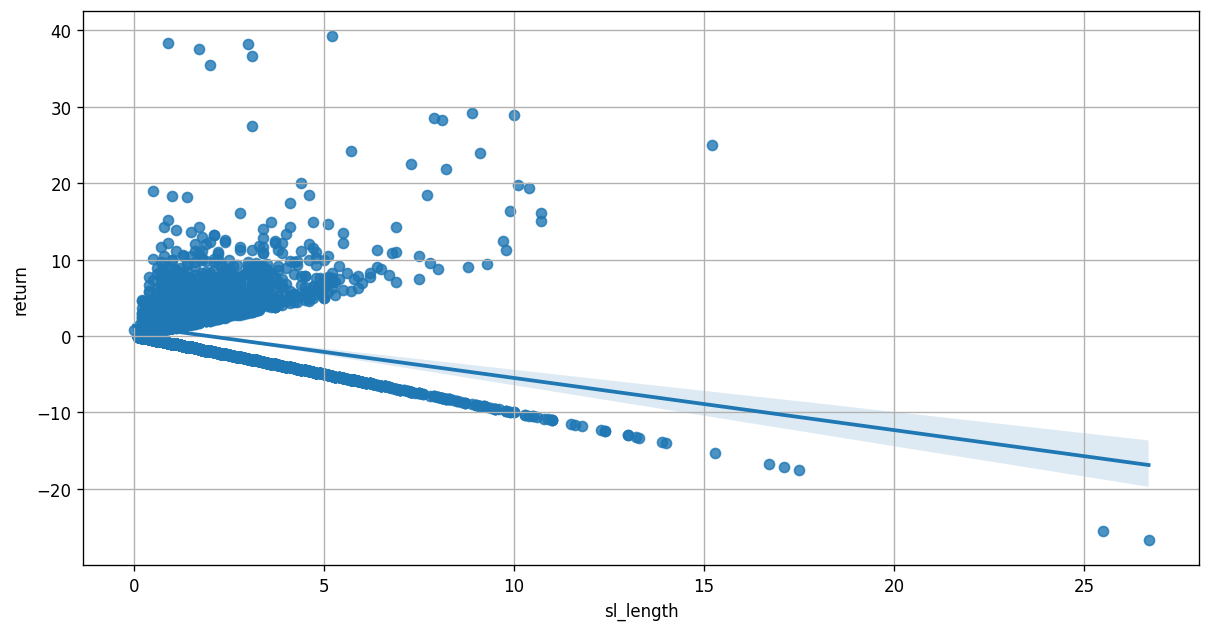

In [43]:
sns.regplot(x=long['sl_length'], y=long['return'])
plt.grid(True)

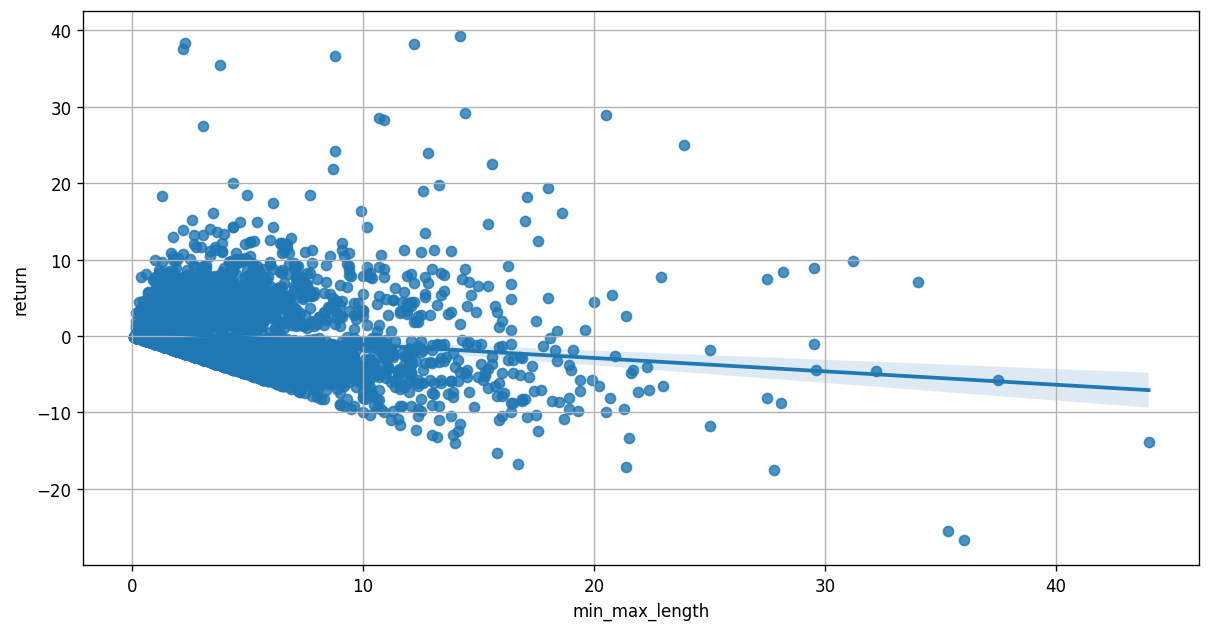

In [44]:
sns.regplot(x=long['min_max_length'], y=long['return'])
plt.grid(True)

<Axes: xlabel='distance_to_min_group', ylabel='sl_group'>

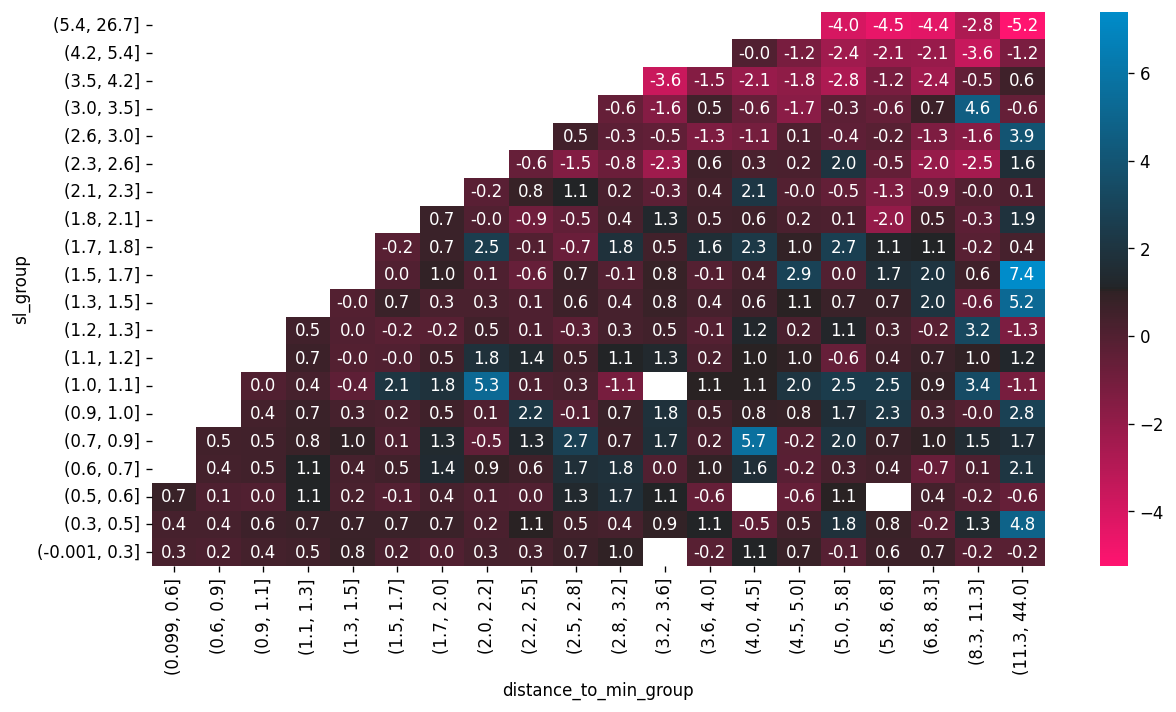

In [45]:
grpd = long.groupby(['sl_group', 'distance_to_min_group'])[['return']]
irs = grpd.mean().reset_index()
sns.heatmap(
    irs.pivot(index='sl_group', columns='distance_to_min_group', values='return').sort_index(ascending=False),
    cmap=sns.diverging_palette(0, 240, s=100, l=55, center="dark", as_cmap=True),
    annot=True, fmt=".1f")

In [46]:
short = has_return[has_return['deal_type'] == 'short']
short['sl_group'] = pd.qcut(short.sl_length, 20)
short['distance_to_max_group'] = pd.qcut(short.min_max_length, 20)

In [47]:
short['min_max_length'].describe()

count    3922.000000
mean        4.805762
std         5.154830
min         0.100000
25%         1.700000
50%         3.300000
75%         5.900000
max        55.400000
Name: min_max_length, dtype: float64

<Axes: xlabel='distance_to_max_group', ylabel='sl_group'>

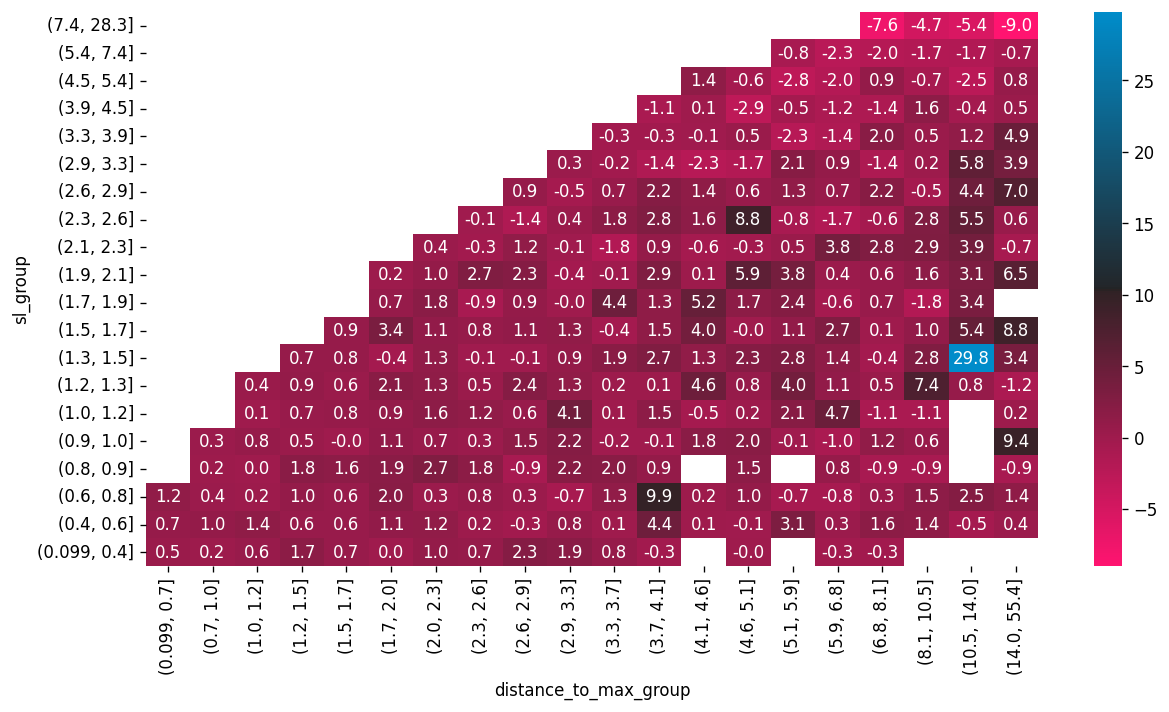

In [48]:
grpd2 = short.groupby(['sl_group', 'distance_to_max_group'])[['return']]
irs2 = grpd2.mean().reset_index()
sns.heatmap(
    irs2.pivot(index='sl_group', columns='distance_to_max_group', values='return').sort_index(ascending=False),
    cmap=sns.diverging_palette(0, 240, s=100, l=55, center="dark", as_cmap=True),
    annot=True, fmt=".1f")